In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.stats import linregress
from decimal import Decimal

In [171]:
# import csv-file
df = pd.read_csv(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Videoer\High concentration\Gauss on same frequency\Resonance-freq.csv', delimiter=',', encoding='utf-8')
t_star = df.iloc[:,2]
x_values = np.arange(0, len(t_star))

In [172]:
# make a gaussian
mean = np.mean(t_star)
std = np.std(t_star)
gauss = np.random.normal(mean, std, len(t_star))

C:\Users\Phili\AppData\Local\Temp\ipykernel_8660\1349427039.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])


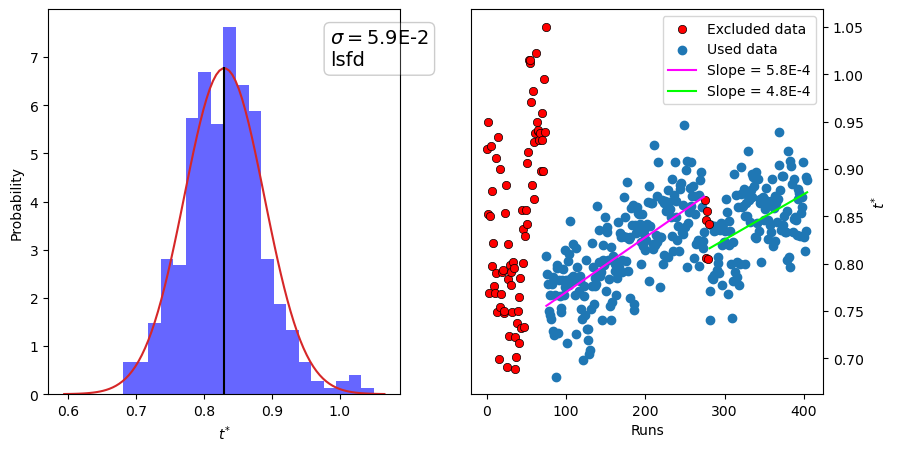

In [200]:
# create side by side sub plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

## plot left side subplot
# Plot the histogram
ax[0].hist(t_star, bins=int(np.floor(np.sqrt(len(t_star)))), density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
ax[0].plot(x, pdf, color='tab:red')
textstr = '\n'.join((r"$\sigma = $" + f"{Decimal(str(std)):.1E}, "lsfd"))
ax[0].text(0.80, 0.95, textstr, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))

# Add labels and title
ax[0].set_xlabel(r'$t^{\mathrm{*}}$')
ax[0].set_ylabel('Probability')
ax[0].vlines(x=mean, ymin=0, ymax=6.785, color='black')

## plot right side subplot

# plot the scatter plot
ax[1].scatter(x_values[:n], t_star[:n], color = "red",edgecolors='black',linewidths=0.5)
#colors = np.where(x_values > m +6 > len(x), 'purple', 'b')
ax[1].scatter(x_values[n:n+m], t_star[n:n+m], color = "tab:blue")
ax[1].scatter(x_values[n+m+6:], t_star[n+m+6:], color = "tab:blue")
ax[1].scatter(x_values[n+m:n+m+6], t_star[n+m:n+m+6], color = "red",edgecolors='black',linewidths=0.5)

ax[1].plot(x_values2_1, y_hat2_1, color="magenta")
ax[1].plot(x_values2_2, y_hat2_2, color="lime")

# Add labels and title
ax[1].set_xlabel('Runs')
ax[1].set_ylabel(r'$t^{\mathrm{*}}$')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])
# save the plot
plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Gauss-distribution.png', dpi=350,bbox_inches = "tight")


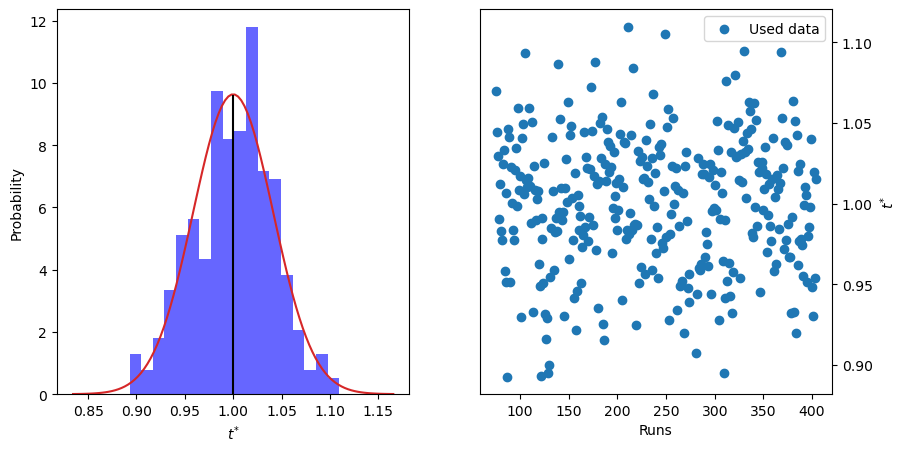

In [169]:
# create side by side sub plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

## plot left side subplot
# Plot the histogram
ax[0].hist(t_star, bins=int(np.floor(np.sqrt(len(t_star)))), density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
ax[0].plot(x, pdf, color='tab:red')

# Add labels and title
ax[0].set_xlabel(r'$t^{\mathrm{*}}$')
ax[0].set_ylabel('Probability')
ax[0].vlines(x=mean, ymin=0, ymax=9.6, color='black')

## plot right side subplot

# plot the scatter plot
ax[1].scatter(x_values, t_star, color="tab:blue")

# Add labels and title
ax[1].set_xlabel('Runs')
ax[1].set_ylabel(r'$t^{\mathrm{*}}$')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].legend(['used'])
# save the plot
plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Gauss-distribution-corrected.png', dpi=350,bbox_inches = "tight")

In [201]:
%history

# import csv-file
df = pd.read_csv(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Videoer\High concentration\Gauss on same frequency\Resonance-freq.csv', delimiter=',', encoding='utf-8')
t_star = df.iloc[:,2]
x_values = np.arrange(0,t_star[-1], len(t_star))
print(x_values)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
# import csv-file
df = pd.read_csv(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Videoer\High concentration\Gauss on same frequency\Resonance-freq.csv', delimiter=',', encoding='utf-8')
t_star = df.iloc[:,2]
x_values = np.arrange(0,t_star[-1], len(t_star))
print(x_values)
# import csv-file
df = pd.read_csv(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Videoer\High concentration\Gauss on same frequency\Resonance-freq.csv', delimiter=',', encoding='utf-8')
t_star = df.iloc[:,2]
x_values = np.arange(0,t_star[-1], len(t_star))
print(x_values)
# import csv-fil